In [1]:
import nltk

In [85]:
import spacy

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [3]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [5]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [7]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [67]:
df = pd.read_csv('greenpeace_ru_.csv',sep=';',encoding='ANSI')

In [68]:
df['Community'] = 9
df['CommunityName'] = 'greenpeace_ru'
df

,Text,Date,LikesCount,RepostCount,URLs,Sentiment,Community,CommunityName
0,Мы вместе с WWF России передали в администраци...,26 06 2019 14:25:45,464,56,NaN,negative,9,greenpeace_ru
1,Чтобы борьба с лесными пожарами была эффективн...,04 07 2019 6:00:01,30,8,NaN,negative,9,greenpeace_ru
2,?? Срок годности — насколько он соответствует ...,03 07 2019 16:30:00,86,15,https://pp.userapi.com/c855728/v855728630/84d1...,positive,9,greenpeace_ru
3,Наши эксперты и волонтёры собрали 13 тысяч пла...,03 07 2019 9:30:02,646,162,https://sun3-1.userapi.com/c858224/v858224187/...,negative,9,greenpeace_ru
4,В Баку в минувшее воскресенье открылась 43-я с...,02 07 2019 14:00:04,147,20,NaN,negative,9,greenpeace_ru
5,?Косаток нужно вносить в Красную книгу! Так ...,02 07 2019 12:00:13,651,29,https://pp.userapi.com/c849532/v849532277/1d00...,positive,9,greenpeace_ru
6,Июль в Мадриде начался с протестов. Еще в выхо...,02 07 2019 9:31:14,224,8,https://pp.userapi.com/c7004/v7004642/66b2b/U7...,negative,9,greenpeace_ru
7,?? Из-за пожаров в Рязанской и Московской обла...,02 07 2019 6:00:03,116,12,NaN,negative,9,greenpeace_ru
8,?Наводнение в Иркутской области — последствие ...,01 07 2019 12:28:49,276,64,NaN,negative,9,greenpeace_ru
9,?? Сухая трава загорается при температуре окол...,01 07 2019 10:00:00,273,56,https://pp.userapi.com/c850024/v850024029/1c75...,positive,9,greenpeace_ru


In [69]:
df = df[df['Sentiment']=='negative']

In [21]:
#df_ = df

In [70]:
df_=pd.concat([df_,df],ignore_index=True)

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [71]:
df_

,Community,CommunityName,Date,LikesCount,RepostCount,Sentiment,Text,URLs,Unnamed: 0
0,0,ecoterinburg,04 07 2019 4:00:03,12,2,negative,???? ЭкоНовости ? Акция раздельного сбора отх...,https://sun3-2.userapi.com/c858224/v858224521/...,0.0
1,0,ecoterinburg,24 06 2019 4:00:02,104,25,negative,???? ЭкоНовости А осознанных жителей все боль...,https://pp.userapi.com/c850036/v850036087/1b7d...,1.0
2,0,ecoterinburg,11 06 2019 4:00:02,13,3,negative,????ЭкоСобытие Почему в Волге больше нельзя к...,https://pp.userapi.com/c849124/v849124740/1aef...,4.0
3,0,ecoterinburg,05 06 2019 4:37:44,47,13,negative,????ЭкоНовости Акция раздельного сбора отходо...,https://pp.userapi.com/c855224/v855224258/5d62...,5.0
4,0,ecoterinburg,20 05 2019 4:00:04,81,4,negative,????ЭкоНовости ?? Итоги Майской прогулки: 1) ...,https://pp.userapi.com/c846220/v846220754/20c7...,7.0
5,0,ecoterinburg,16 05 2019 4:00:01,11,1,negative,????ЭкоСобытие Друзья! Открыта регистрация н...,NaN,8.0
6,0,ecoterinburg,15 05 2019 4:00:02,55,13,negative,????ЭкоСобытие Акция раздельного сбора отход...,https://pp.userapi.com/c845321/v845321160/2012...,9.0
7,0,ecoterinburg,13 05 2019 13:00:07,17,1,negative,??Объявляем набор волонтеров на самую масштабн...,https://pp.userapi.com/c855236/v855236889/3ef9...,11.0
8,0,ecoterinburg,13 05 2019 4:15:00,47,12,negative,????ЭкоСобытие Открыт набор на масштабную пос...,https://pp.userapi.com/c852024/v852024056/11a3...,12.0
9,0,ecoterinburg,06 05 2019 4:15:00,31,4,negative,????ЭкоСобытие Представляем новую настольную ...,https://pp.userapi.com/c852024/v852024056/11a3...,13.0


In [72]:
df_.to_csv("TopicModeling.csv", sep=';', encoding='ANSI')

In [133]:
# Convert to list
data = df_['Text'].values.tolist()
data = [str(sent) for sent in data]


#data = data.apply(lambda x: x.lower())

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

data = [re.sub("[.,!/-_:@?0-9a-z]+", "", sent) for sent in data]

pprint(data[:1])

[' ЭкоНовости  Акция раздельного сбора отходов КОГДА  июля (суббота) с  до  '
 'ГДЕ Первомайская   ВНИМАНИЕ  НА ЭТОЙ АКЦИИ СТЕКЛО ПРИНИМАТЬСЯ НЕ БУДЕТ '
 'ТЕПЕРЬ В МАКУЛАТУРУ НЕЛЬЗЯ СКЛАДЫВАТЬ ЧЕКИ Подробнее ПРАВИЛА сортировки '
 'здесь -  Продолжаем сезон сбора растительной органики с проектом Расти '
 'Город  Что можно сдать в #горкомпост вы также найдете в правилах сортировки  '
 'Также на этой акции будут приниматься ПЕНОПЛАСТ и ПЛАСТИКОВЫЕ КАРТЫ (ТОЛЬКО '
 'пластиковые бумажные в ламинации просим не сдавать при наличии '
 'металлического чипа необходимо его удалить) Если вы не уверены в каких-то '
 'фракциях или что-то не поняли - не переживайте Мы поможем на месте '
 'разобраться и досортировать Но для экономии вашего и нашего времени будет '
 'очень замечательно если вы учтете пожелания по сортировке Все отходы которые '
 'отказались принять волонтеры по объективным причинам просим забирать обратно '
 'и выбрасывать самостоятельно  На акции будет организован прием '
 'неиспользо

In [134]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['эконовости', 'акция', 'раздельного', 'сбора', 'отходов', 'когда', 'июля', 'суббота', 'до', 'где', 'первомаиская', 'внимание', 'на', 'этои', 'акции', 'стекло', 'приниматься', 'не', 'будет', 'теперь', 'макулатуру', 'нельзя', 'складывать', 'чеки', 'подробнее', 'правила', 'сортировки', 'здесь', 'продолжаем', 'сезон', 'сбора', 'растительнои', 'органики', 'проектом', 'расти', 'город', 'что', 'можно', 'сдать', 'горкомпост', 'вы', 'также', 'наидете', 'правилах', 'сортировки', 'также', 'на', 'этои', 'акции', 'будут', 'приниматься', 'пенопласт', 'пластиковые', 'карты', 'только', 'пластиковые', 'бумажные', 'ламинации', 'просим', 'не', 'сдавать', 'при', 'наличии', 'металлического', 'чипа', 'необходимо', 'его', 'удалить', 'если', 'вы', 'не', 'уверены', 'каких', 'то', 'фракциях', 'или', 'что', 'то', 'не', 'поняли', 'не', 'переживаите', 'мы', 'поможем', 'на', 'месте', 'разобраться', 'досортировать', 'но', 'для', 'экономии', 'вашего', 'нашего', 'времени', 'будет', 'очень', 'замечательно', 'если', '

In [135]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['эконовости', 'акция', 'раздельного_сбора', 'отходов', 'когда', 'июля', 'суббота_до', 'где', 'первомаиская', 'внимание', 'на', 'этои', 'акции', 'стекло', 'приниматься', 'не', 'будет', 'теперь', 'макулатуру', 'нельзя', 'складывать', 'чеки', 'подробнее', 'правила_сортировки_здесь', 'продолжаем', 'сезон', 'сбора', 'растительнои', 'органики', 'проектом', 'расти_город', 'что', 'можно_сдать', 'горкомпост', 'вы', 'также', 'наидете', 'правилах', 'сортировки', 'также', 'на', 'этои', 'акции', 'будут', 'приниматься', 'пенопласт', 'пластиковые', 'карты', 'только', 'пластиковые', 'бумажные', 'ламинации', 'просим', 'не', 'сдавать', 'при_наличии', 'металлического', 'чипа', 'необходимо', 'его', 'удалить', 'если', 'вы', 'не', 'уверены_каких', 'то', 'фракциях', 'или', 'что', 'то', 'не', 'поняли', 'не', 'переживаите', 'мы', 'поможем', 'на', 'месте_разобраться_досортировать', 'но', 'для', 'экономии_вашего_нашего', 'времени', 'будет', 'очень_замечательно', 'если', 'вы', 'учтете', 'пожелания', 'по', 'сорти

In [111]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [124]:
import string

In [153]:
def preprocessing(text):
    text2 = " ".join("".join([" " if ch in string.punctuation else ch for ch in text]).split())
    tokens = [word for sent in nltk.sent_tokenize(text2) for word in nltk.word_tokenize(sent)]
    tokens = [word.lower() for word in tokens]
    stop_words.extend(['это', 'год', 'ещё', 'наш'])
    stopwds = stopwords.words('russian')    
    tokens = [token for token in tokens if token not in stopwds]
    tokens = [word for word in tokens if len(word)>=3]
    tokens = [morph.parse(word)[0].normal_form for word in tokens]
    
    pre_proc_text =   " ".join([i for i in tokens])

    return pre_proc_text

In [154]:
data_lemmatized = []
for i in data:
    data_lemmatized.append(preprocessing(i))
data_lemmatized

['эконовость акция раздельный сбор отход июль суббота первомайский внимание акция стекло приниматься макулатура складывать чек дробный правило сортировка продолжать сезон сбор растительный органика проект растить город сдать горкомпост также найти правило сортировка также акция быть приниматься пенопласт пластиковый карта пластиковый бумажный ламинация просить сдавать наличие металлический чип необходимый удалить уверить какой фракция понять переживать помочь место разобраться досортировать экономия ваш наш время очень замечательный учесть пожелание сортировка отход который отказаться принять волонтёр объективный причина просить забирать обратно выбрасывать самостоятельно акция организовать приём неиспользованный моток остаток шерсть спица социальный проект весь связать пройти мастер класс изготовление экоручка хотеть принять участие просить заполнить форма регистрация свой стержень ручка здорово прихватить себя точка сбор осуществляться продажа экотовар инклюзивный мастерский город ма

In [155]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_lemmatized)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [156]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 5), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 3), (76, 3), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 6), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 3), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 1), (103, 3), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [157]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('акция', 5),
  ('анна', 1),
  ('бесценный', 1),
  ('бумажный', 1),
  ('ваш', 2),
  ('весь', 1),
  ('внимание', 1),
  ('волонтёр', 2),
  ('вопрос', 1),
  ('время', 1),
  ('встать', 1),
  ('встреча', 1),
  ('выбрасывать', 1),
  ('вызывать', 1),
  ('горкомпост', 1),
  ('город', 2),
  ('готовый', 1),
  ('группа', 1),
  ('дробный', 1),
  ('забирать', 1),
  ('задумываться', 1),
  ('замечательный', 1),
  ('заниматься', 1),
  ('заполнить', 1),
  ('здорово', 1),
  ('изготовление', 1),
  ('инклюзивный', 1),
  ('июль', 1),
  ('карта', 1),
  ('который', 1),
  ('ламинация', 1),
  ('макулатура', 1),
  ('мастер', 1),
  ('мастер_класс', 1),
  ('мастерский', 1),
  ('место', 2),
  ('металлический', 1),
  ('многий', 1),
  ('моток', 1),
  ('найти', 1),
  ('наличие', 1),
  ('необходимый', 1),
  ('обратно', 1),
  ('объективный', 1),
  ('опасение', 1),
  ('организовать', 1),
  ('органика', 1),
  ('остаток', 1),
  ('осуществляться', 1),
  ('отказаться', 1),
  ('отход', 2),
  ('очень', 1),
  ('пара', 1),
  

In [194]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [195]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"костёр" + 0.016*"угрожать" + 0.014*"правило" + 0.012*"банка" + '
  '0.011*"костра" + 0.011*"потерять" + 0.011*"товар" + 0.010*"сумма" + '
  '0.010*"отличный" + 0.009*"потушить"'),
 (1,
  '0.023*"россия" + 0.017*"воздух" + 0.012*"проект" + 0.010*"леса" + '
  '0.010*"который" + 0.010*"лес" + 0.009*"территория" + 0.008*"загрязнение" + '
  '0.008*"природный" + 0.008*"природа"'),
 (2,
  '0.021*"пожар" + 0.010*"свой" + 0.010*"человек" + 0.010*"друг" + '
  '0.010*"акция" + 0.008*"узнать" + 0.008*"пожарный" + 0.008*"пройти" + '
  '0.008*"день" + 0.007*"москва"'),
 (3,
  '0.027*"косатка" + 0.018*"животное" + 0.015*"белуха" + 0.014*"тюрьма" + '
  '0.013*"поделиться" + 0.013*"китовый" + 0.012*"фото" + 0.011*"рыба" + '
  '0.011*"природа" + 0.010*"край"'),
 (4,
  '0.022*"отход" + 0.009*"добровольный" + 0.009*"обращение" + 0.008*"объект" + '
  '0.008*"который" + 0.008*"дать" + 0.008*"федеральный" + 0.007*"минприрода" + '
  '0.007*"закон" + 0.007*"среда"'),
 (5,
  '0.033*"вещество" + 0

In [196]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.



Perplexity:  -8.258804910341205


In [197]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.42552484990742506


In [198]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


In [199]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\1\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.056663 -0.218784       1        1  32.985474
7      0.193394  0.062786       2        1  19.012667
1      0.199014 -0.152238       3        1  17.675859
2      0.162678  0.262608       4        1  16.471706
3     -0.190753  0.084145       5        1   5.932248
5     -0.118668 -0.058482       6        1   4.656283
6     -0.159603  0.012316       7        1   1.752749
0     -0.142725  0.007649       8        1   1.513026, topic_info=      Category         Freq          Term        Total  loglift  logprob
181    Default   633.000000        россия   633.000000  30.0000  30.0000
1715   Default   478.000000        объект   478.000000  29.0000  29.0000
7751   Default   464.000000         пожар   464.000000  28.0000  28.0000
1591   Default   481.000000        воздух   481.000000  27.0000  27.0000
3433   Default   189.000000        лесной   189.000000  26.0000  26.0000
50     Default  1091.000000         отход  1091.000000  25.0000  25.0000
1589   Default   207.000000      вещество   207.000000  24.0000  24.0000
9668   Default   216.000000       косатка   216.000000  23.0000  23.0000
64     Default   225.000000       правило   225.000000  22.0000  22.0000
207    Default   360.000000       пластик   360.000000  21.0000  21.0000
2255   Default   164.000000         земля   164.000000  20.0000  20.0000
1911   Default   170.000000        выброс   170.000000  19.0000  19.0000
613    Default   241.000000      животное   241.000000  18.0000  18.0000
57     Default   281.000000   пластиковый   281.000000  17.0000  17.0000
1457   Default   363.000000    окружающий   363.000000  16.0000  16.0000
3430   Default   417.000000  добровольный   417.000000  15.0000  15.0000
399    Default   262.000000         пакет   262.000000  14.0000  14.0000
73     Default   380.000000        проект   380.000000  13.0000  13.0000
1635   Default   248.000000          леса   248.000000  12.0000  12.0000
530    Default   400.000000       природа   400.000000  11.0000  11.0000
1456   Default   249.000000   одноразовый   249.000000  10.0000  10.0000
293    Default   248.000000         мусор   248.000000   9.0000   9.0000
1735   Default   263.000000   воздействие   263.000000   8.0000   8.0000
29     Default   918.000000       который   918.000000   7.0000   7.0000
687    Default   368.000000         среда   368.000000   6.0000   6.0000
482    Default   229.000000           лес   229.000000   5.0000   5.0000
298    Default   366.000000       область   366.000000   4.0000   4.0000
247    Default   402.000000       человек   402.000000   3.0000   3.0000
269    Default   211.000000          друг   211.000000   2.0000   2.0000
3920   Default   120.000000         назад   120.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
703     Topic8    20.248177      отличный    21.541693   4.1291  -4.6032
10878   Topic8    17.275597      потушить    18.566704   4.1190  -4.7619
10873   Topic8    16.353458  непотушенный    17.644779   4.1151  -4.8168
1530    Topic8    15.636312    перемешать    16.928244   4.1117  -4.8616
1970    Topic8    15.580218       пролить    16.871485   4.1114  -4.8652
698     Topic8    14.498001          кома    15.792919   4.1055  -4.9372
1105    Topic8    14.329301          уйти    15.626589   4.1044  -4.9489
10876   Topic8    14.122811          очаг    15.416246   4.1034  -4.9634
1720    Topic8    13.682524     составить    14.976308   4.1007  -4.9951
10867   Topic8    11.405484    загореться    12.698286   4.0837  -5.1771
4010    Topic8    11.307064     вернуться    12.605929   4.0823  -5.1858
696     Topic8    10.653456     выступать    11.949412   4.0763  -5.2453
169     Topic8    10.653200      нефтяной    11.949867   4.0762  -5.2454
9833    Topic8    10.144483       экослед    11.435093   4.0713  -5.2943
10883   Topic8     8.476903       хворост     9.768127   4.

In [187]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):  
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        model_list.append(lda_model)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [166]:
from gensim.models.wrappers import LdaMallet

In [178]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=2, limit=20, step=2)

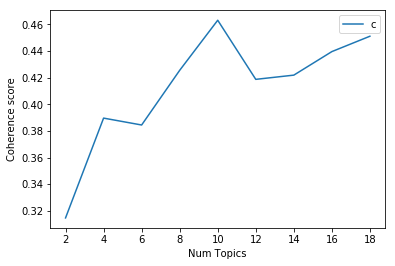

In [180]:
# Show graph
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [200]:
coherence_model_lda = CoherenceModel(model=model_list[4], texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4631590166583154


In [202]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_list[4], corpus, id2word)
vis

C:\Users\1\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.099207 -0.207366       1        1  31.230885
1     -0.239760 -0.135654       2        1  17.697130
7     -0.213439  0.035377       3        1  17.681393
2     -0.173161  0.161986       4        1  14.490168
8     -0.000645  0.289094       5        1   6.846461
5      0.105185 -0.097994       6        1   6.360547
9      0.159800 -0.014682       7        1   1.746095
0      0.164552 -0.006383       8        1   1.721580
3      0.151639 -0.010636       9        1   1.273973
6      0.145036 -0.013742      10        1   0.951762, topic_info=      Category         Freq            Term        Total  loglift  logprob
1715   Default   484.000000          объект   484.000000  30.0000  30.0000
298    Default   351.000000         область   351.000000  29.0000  29.0000
7751   Default   350.000000           пожар   350.000000  28.0000  28.0000
181    Default   649.000000          россия   649.000000  27.0000  27.0000
50     Default  1151.000000           отход  1151.000000  26.0000  26.0000
1591   Default   535.000000          воздух   535.000000  25.0000  25.0000
9668   Default   194.000000         косатка   194.000000  24.0000  24.0000
1589   Default   278.000000        вещество   278.000000  23.0000  23.0000
4      Default   296.000000             ваш   296.000000  22.0000  22.0000
1457   Default   382.000000      окружающий   382.000000  21.0000  21.0000
687    Default   375.000000           среда   375.000000  20.0000  20.0000
207    Default   379.000000         пластик   379.000000  19.0000  19.0000
1911   Default   228.000000          выброс   228.000000  18.0000  18.0000
530    Default   441.000000         природа   441.000000  17.0000  17.0000
1635   Default   191.000000            леса   191.000000  16.0000  16.0000
3433   Default   299.000000          лесной   299.000000  15.0000  15.0000
57     Default   296.000000     пластиковый   296.000000  14.0000  14.0000
85     Default   429.000000            свой   429.000000  13.0000  13.0000
1735   Default   261.000000     воздействие   261.000000  12.0000  12.0000
399    Default   276.000000           пакет   276.000000  11.0000  11.0000
3430   Default   421.000000    добровольный   421.000000  10.0000  10.0000
0      Default   239.000000           акция   239.000000   9.0000   9.0000
1456   Default   262.000000     одноразовый   262.000000   8.0000   8.0000
293    Default   261.000000           мусор   261.000000   7.0000   7.0000
29     Default   951.000000         который   951.000000   6.0000   6.0000
10860  Default   104.000000          тюрьма   104.000000   5.0000   5.0000
167    Default   224.000000          москва   224.000000   4.0000   4.0000
1623   Default   146.000000      загрязнять   146.000000   3.0000   3.0000
482    Default   237.000000             лес   237.000000   2.0000   2.0000
10847  Default    93.000000         китовый    93.000000   1.0000   1.0000
...        ...          ...             ...          ...      ...      ...
555    Topic10    12.764702           скоро    14.034814   4.5598  -4.6010
3447   Topic10    11.622567       пригодный    12.893083   4.5509  -4.6947
938    Topic10    11.487006         дыхание    12.757649   4.5497  -4.7064
3017   Topic10     9.183065            лето    10.453698   4.5250  -4.9303
529    Topic10     8.589482       попросить     9.859701   4.5167  -4.9971
921    Topic10     8.267457     выкладывать     9.538429   4.5116  -5.0353
10919  Topic10     7.984850       забросить     9.256308   4.5069  -5.0701
950    Topic10     6.680563     лаборатория     7.950700   4.4806  -5.2485
2586   Topic10     6.554550     прокуратура     7.824476   4.4775  -5.2675
2434   Topic10     6.539280     департамент     7.809055   4.4772  -5.2698
3213   Topic10     5.769993        вывозить     7.040230   4.4556  -5.3950
874    Topic10     5.698329             имя     6.968316   4.4534  -5.4075
4915   To

In [238]:
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.084*"косатка" + 0.045*"тюрьма" + 0.040*"китовый" + 0.029*"против" + '
  '0.019*"освобождение" + 0.017*"выпустить" + 0.016*"освободить" + '
  '0.015*"выпуск" + 0.014*"угрожать" + 0.013*"вольер"'),
 (1,
  '0.024*"россия" + 0.017*"воздух" + 0.015*"природа" + 0.013*"лесной" + '
  '0.011*"проект" + 0.011*"который" + 0.010*"лес" + 0.010*"территория" + '
  '0.008*"загрязнение" + 0.008*"природный"'),
 (2,
  '0.014*"свой" + 0.012*"акция" + 0.012*"день" + 0.012*"москва" + '
  '0.011*"пройти" + 0.010*"узнать" + 0.010*"пожарный" + 0.010*"друг" + '
  '0.009*"карта" + 0.009*"дикий"'),
 (3,
  '0.046*"фото" + 0.039*"делиться" + 0.031*"фотография" + 0.026*"страница" + '
  '0.024*"часземля" + 0.021*"ответьзаприрода" + 0.021*"ваш" + 0.021*"выбрать" '
  '+ 0.018*"автор_фото" + 0.018*"хэштег"'),
 (4,
  '0.024*"отход" + 0.010*"добровольный" + 0.010*"обращение" + 0.009*"дать" + '
  '0.009*"который" + 0.008*"статья" + 0.008*"правило" + 0.008*"федеральный" + '
  '0.008*"случай" + 0.007*"закон"'),
 (5

In [242]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


In [243]:
df_dominant_topic['CommunityName']=df_['CommunityName']
df_dominant_topic['Community']=df_['Community']
# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,CommunityName,Community
0,0,2.0,0.7456,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоНовости Акция раздельного сбора отходов К...,ecoterinburg,0
1,1,2.0,0.5086,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоНовости А осознанных жителей все больше Пр...,ecoterinburg,0
2,2,1.0,0.4119,"россия, воздух, природа, лесной, проект, котор...",ЭкоСобытие Почему в Волге больше нельзя купать...,ecoterinburg,0
3,3,2.0,0.6295,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоНовости Акция раздельного сбора отходов от ...,ecoterinburg,0
4,4,3.0,0.3032,"фото, делиться, фотография, страница, часземля...",ЭкоНовости Итоги Майской прогулки ) Лампы рту...,ecoterinburg,0
5,5,7.0,0.4892,"пластик, который, пластиковый, пакет, одноразо...",ЭкоСобытие Друзья Открыта регистрация на эколо...,ecoterinburg,0
6,6,2.0,0.8096,"свой, акция, день, москва, пройти, узнать, пож...",ЭкоСобытие Акция раздельного сбора отходов |Чи...,ecoterinburg,0
7,7,7.0,0.2842,"пластик, который, пластиковый, пакет, одноразо...",Объявляем набор волонтеров на самую масштабную...,ecoterinburg,0
8,8,7.0,0.5217,"пластик, который, пластиковый, пакет, одноразо...",ЭкоСобытие Открыт набор на масштабную посадку ...,ecoterinburg,0
9,9,7.0,0.7957,"пластик, который, пластиковый, пакет, одноразо...",ЭкоСобытие Представляем новую настольную игру ...,ecoterinburg,0


In [244]:
df_dominant_topic.to_csv("TopicModeling_dominantTopik.csv", sep=';', encoding='ANSI')

In [249]:
df_dominant_topic[df_dominant_topic['Dominant_Topic']==6]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,CommunityName,Community,TopicName


In [247]:
df_dominant_topic['TopicName'] = df_dominant_topic['Dominant_Topic']
df_dominant_topic['TopicName'] = df_dominant_topic['TopicName'].map({0: 'Китовая тюрьма'})